In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")


In [ ]:


file_path = "data/Bangalore_1day_NETC.csv"  
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367074 entries, 0 to 367073
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SlNo.                367074 non-null  int64 
 1   merchant_name        367074 non-null  object
 2   direction            367074 non-null  object
 3   lane                 367074 non-null  object
 4   tag_id               367074 non-null  object
 5   vehicle_regn_number  367074 non-null  object
 6   txn_amount           367074 non-null  int64 
 7   initiated_time       367074 non-null  object
 8   inn_rr_time_sec      367074 non-null  int64 
 9   vehicle_class_code   367074 non-null  object
 10  vehicle_comvehicle   367074 non-null  object
 11  geocode              367074 non-null  object
 12  merchant_sub_type    367074 non-null  object
 13  city                 367074 non-null  object
 14  state                367074 non-null  object
dtypes: int64(3), obj

In [86]:
print(df['initiated_time'].head(10))  
print(df['initiated_time'].dtype)  


0    00-01-1900 21:54
1    00-01-1900 18:59
2    00-01-1900 00:14
3    00-01-1900 18:19
4    00-01-1900 15:03
5    00-01-1900 16:48
6    00-01-1900 20:23
7    00-01-1900 06:13
8    00-01-1900 21:18
9    00-01-1900 19:17
Name: initiated_time, dtype: object
object


In [87]:
from datetime import datetime

df['fixed_time'] = df['initiated_time'].str[-5:] 


df['initiated_time'] = pd.to_datetime('2024-03-19 ' + df['fixed_time'], format='%Y-%m-%d %H:%M')

df.drop(columns=['fixed_time'], inplace=True)

print(df[['initiated_time']].head())
print(df['initiated_time'].dtype) 


       initiated_time
0 2024-03-19 21:54:00
1 2024-03-19 18:59:00
2 2024-03-19 00:14:00
3 2024-03-19 18:19:00
4 2024-03-19 15:03:00
datetime64[ns]


In [88]:

# Feature Engineering - Extract time-based features
df['hour'] = df['initiated_time'].dt.hour
df['day_of_week'] = df['initiated_time'].dt.dayofweek

In [89]:
# Data Transformation - Normalize transaction amounts
scaler = MinMaxScaler()
df['txn_amount_scaled'] = scaler.fit_transform(df[['txn_amount']])

# Encode categorical variables
encoder = LabelEncoder()
df['vehicle_class_code_enc'] = encoder.fit_transform(df['vehicle_class_code'])
df['merchant_name_enc'] = encoder.fit_transform(df['merchant_name'])


In [90]:
df['hour'] = df['initiated_time'].dt.hour


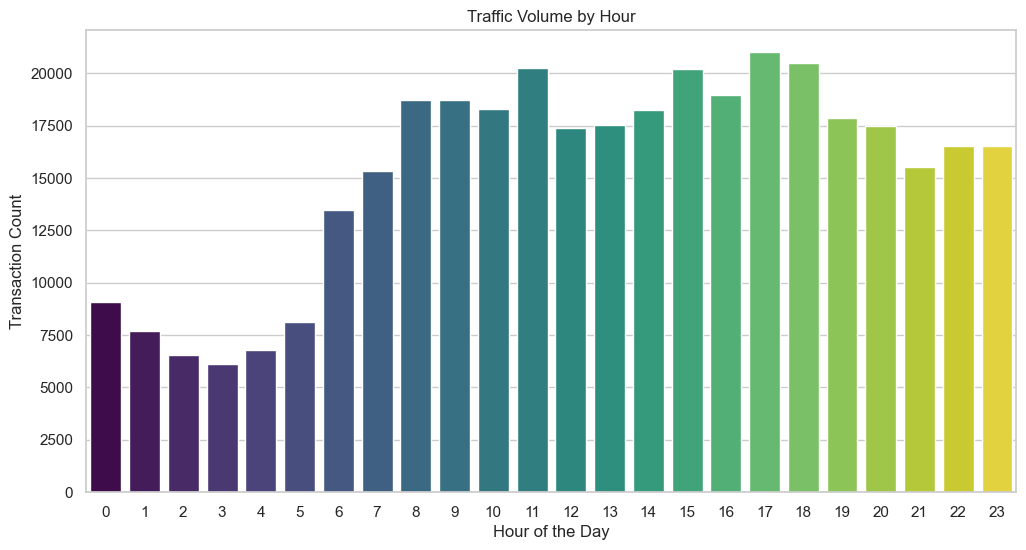

In [91]:
# Data Visualization - Traffic volume by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='hour', data=df, palette='viridis', legend=False)
plt.title('Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.show()

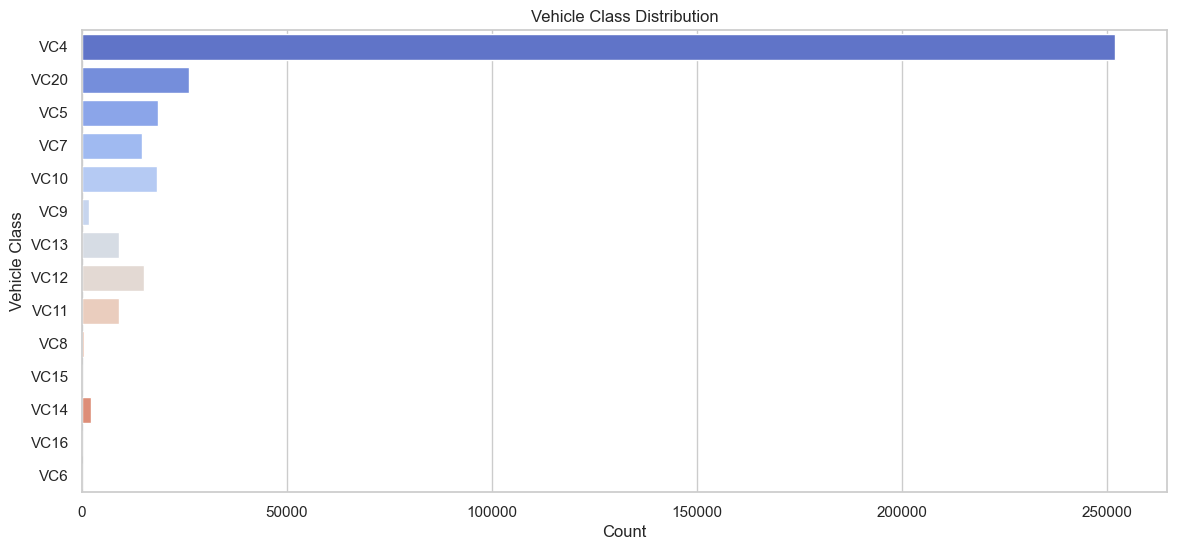

In [92]:
# Data Visualization - Vehicle class distribution
plt.figure(figsize=(14, 6))
sns.countplot(y='vehicle_class_code', hue='vehicle_class_code', data=df, palette='coolwarm', legend=False)
plt.title('Vehicle Class Distribution')
plt.ylabel('Vehicle Class')
plt.xlabel('Count')
plt.show()

In [93]:
# 1. DATASET EXPLORATION
print("1. Basic Dataset Information")
print("-" * 50)
print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 Rows:")
print(df.head())

# Basic statistics
print("\n2. Basic Statistics")
print("-" * 50)
print(df.describe().T)

# Check for any null values
print("\n3. Null Value Check")
print("-" * 50)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0] if any(null_counts > 0) else "No null values found")

1. Basic Dataset Information
--------------------------------------------------
Dataset Shape: (367074, 20)

Column Names:
['SlNo.', 'merchant_name', 'direction', 'lane', 'tag_id', 'vehicle_regn_number', 'txn_amount', 'initiated_time', 'inn_rr_time_sec', 'vehicle_class_code', 'vehicle_comvehicle', 'geocode', 'merchant_sub_type', 'city', 'state', 'hour', 'day_of_week', 'txn_amount_scaled', 'vehicle_class_code_enc', 'merchant_name_enc']

Data Types:
SlNo.                              int64
merchant_name                     object
direction                         object
lane                              object
tag_id                            object
vehicle_regn_number               object
txn_amount                         int64
initiated_time            datetime64[ns]
inn_rr_time_sec                    int64
vehicle_class_code                object
vehicle_comvehicle                object
geocode                           object
merchant_sub_type                 object
city           

In [94]:
# 2. DATA PREPROCESSING

# Convert initiated_time to datetime
print("\n4. Time-based Feature Engineering")
print("-" * 50)
df['initiated_time'] = pd.to_datetime(df['initiated_time'])
df['hour'] = df['initiated_time'].dt.hour
df['minute'] = df['initiated_time'].dt.minute
df['day_of_week'] = df['initiated_time'].dt.dayofweek
df['time_of_day'] = pd.cut(df['hour'], 
                          bins=[0, 6, 12, 18, 24], 
                          labels=['Night', 'Morning', 'Afternoon', 'Evening'])

print("Time-based features created: hour, minute, day_of_week, time_of_day")
print(df[['initiated_time', 'hour', 'minute', 'day_of_week', 'time_of_day']].head())

# Process geocode column if it contains lat, long coordinates
print("\n5. Location Feature Processing")
print("-" * 50)
if 'geocode' in df.columns:
    # Check if geocode contains lat,long format
    if df['geocode'].iloc[0].find(',') > 0:
        df[['latitude', 'longitude']] = df['geocode'].str.split(',', expand=True).astype(float)
        print("Extracted latitude and longitude from geocode")
        print(df[['geocode', 'latitude', 'longitude']].head())
    else:
        print("Geocode format is not as expected. Manual inspection required.")
else:
    print("Geocode column not found in dataset")

# Encode categorical variables
print("\n6. Categorical Feature Encoding")
print("-" * 50)
categorical_cols = ['merchant_name', 'direction', 'lane', 'vehicle_class_code', 
                   'merchant_sub_type', 'city', 'state']
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Create a dictionary to store label encoders
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    print(f"Encoded {col} with {len(le.classes_)} unique values")


4. Time-based Feature Engineering
--------------------------------------------------
Time-based features created: hour, minute, day_of_week, time_of_day
       initiated_time  hour  minute  day_of_week time_of_day
0 2024-03-19 21:54:00    21      54            1     Evening
1 2024-03-19 18:59:00    18      59            1   Afternoon
2 2024-03-19 00:14:00     0      14            1         NaN
3 2024-03-19 18:19:00    18      19            1   Afternoon
4 2024-03-19 15:03:00    15       3            1   Afternoon

5. Location Feature Processing
--------------------------------------------------
Extracted latitude and longitude from geocode
                 geocode   latitude  longitude
0    12.850056,77.588333  12.850056  77.588333
1    12.850056,77.588333  12.850056  77.588333
2    12.850056,77.588333  12.850056  77.588333
3  13.2123515,77.5535138  13.212352  77.553514
4  13.2123515,77.5535138  13.212352  77.553514

6. Categorical Feature Encoding
------------------------------------


7. Transaction Amount Analysis
--------------------------------------------------
Min Transaction Amount: 3
Max Transaction Amount: 2990
Mean Transaction Amount: 82.72
Median Transaction Amount: 55.0


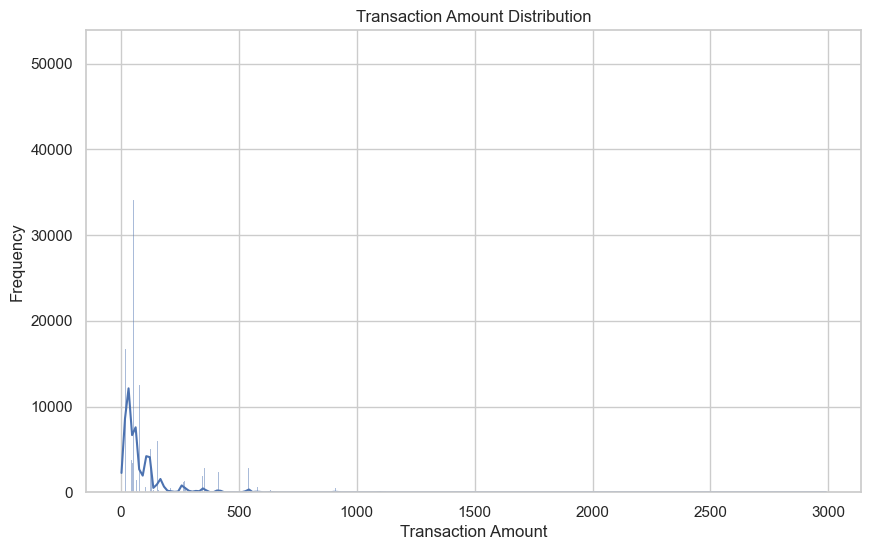

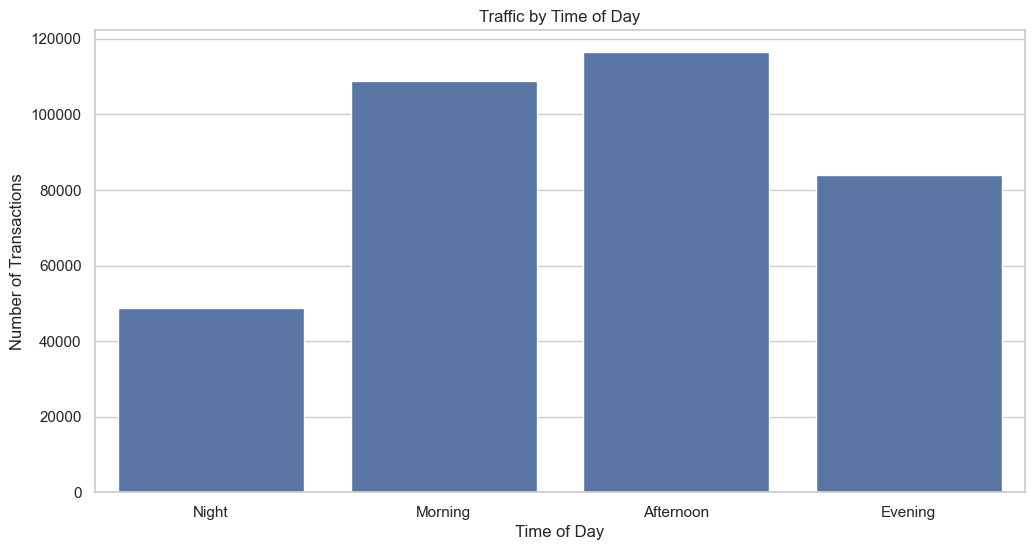

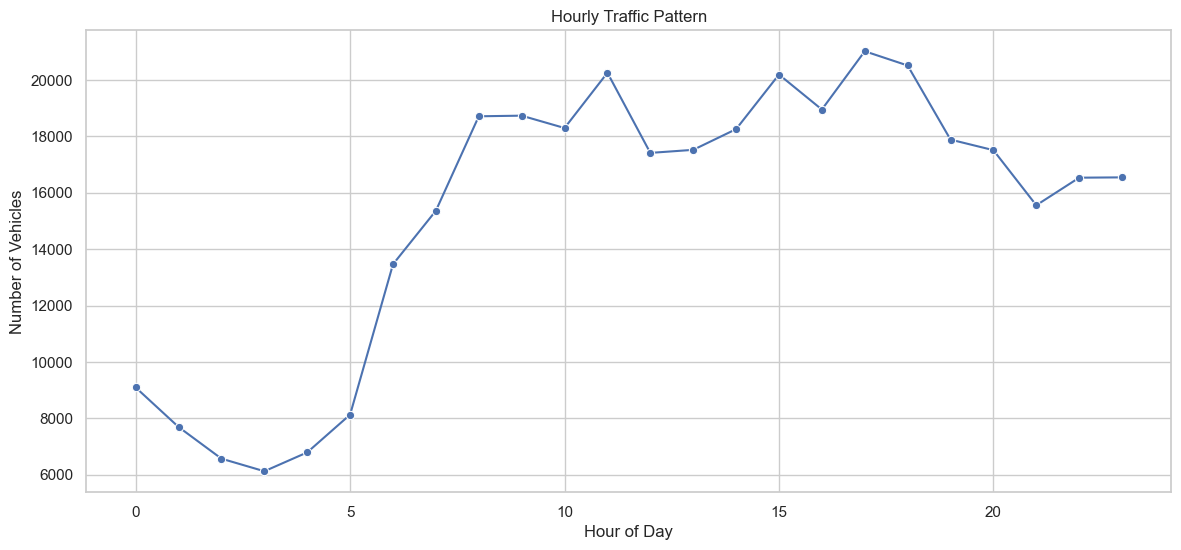

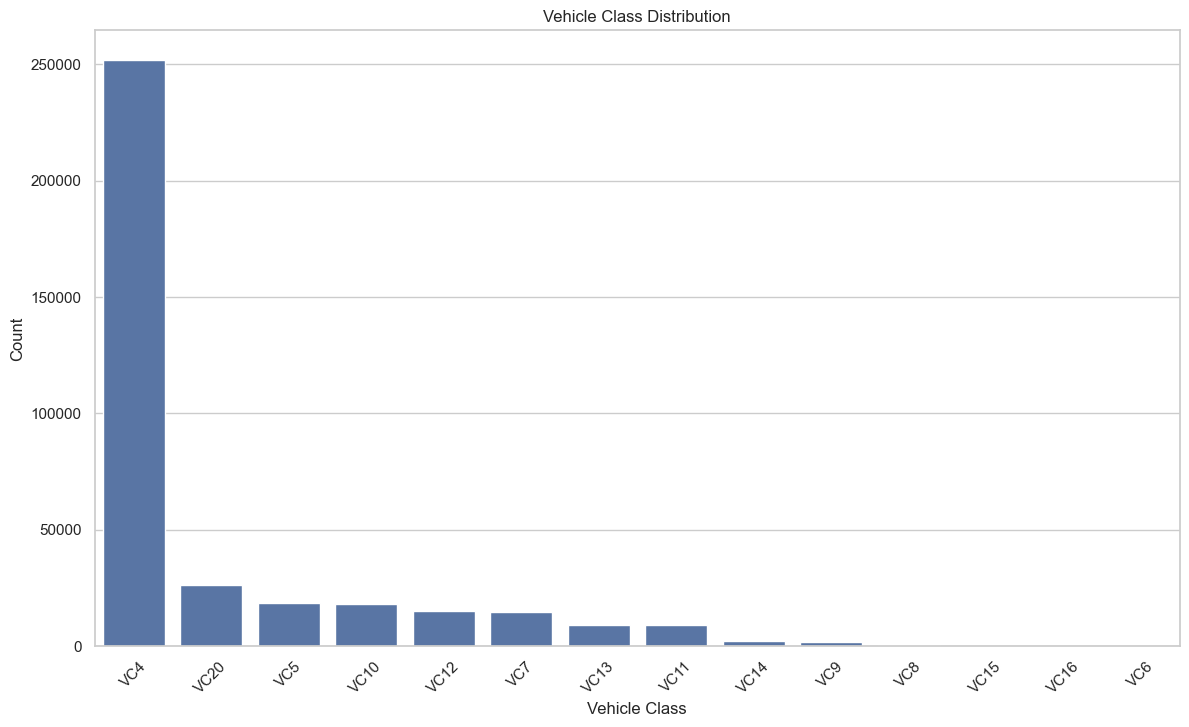

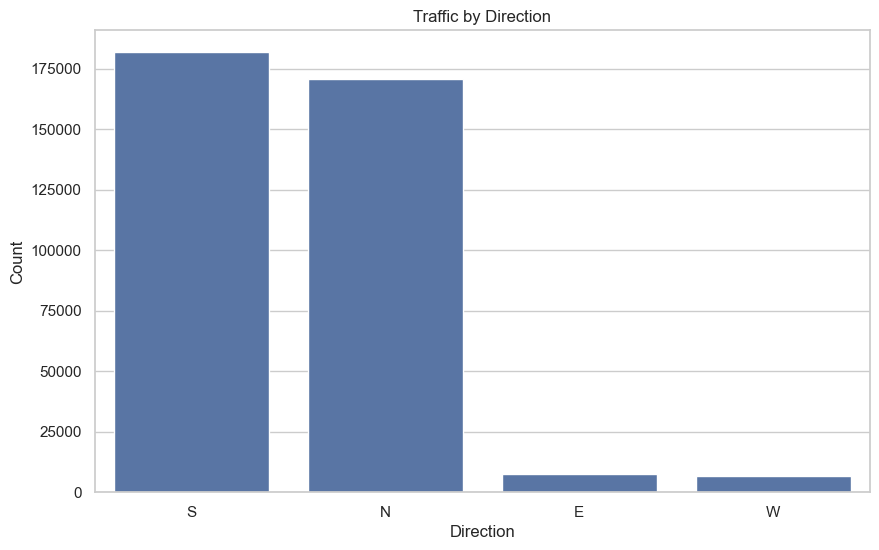

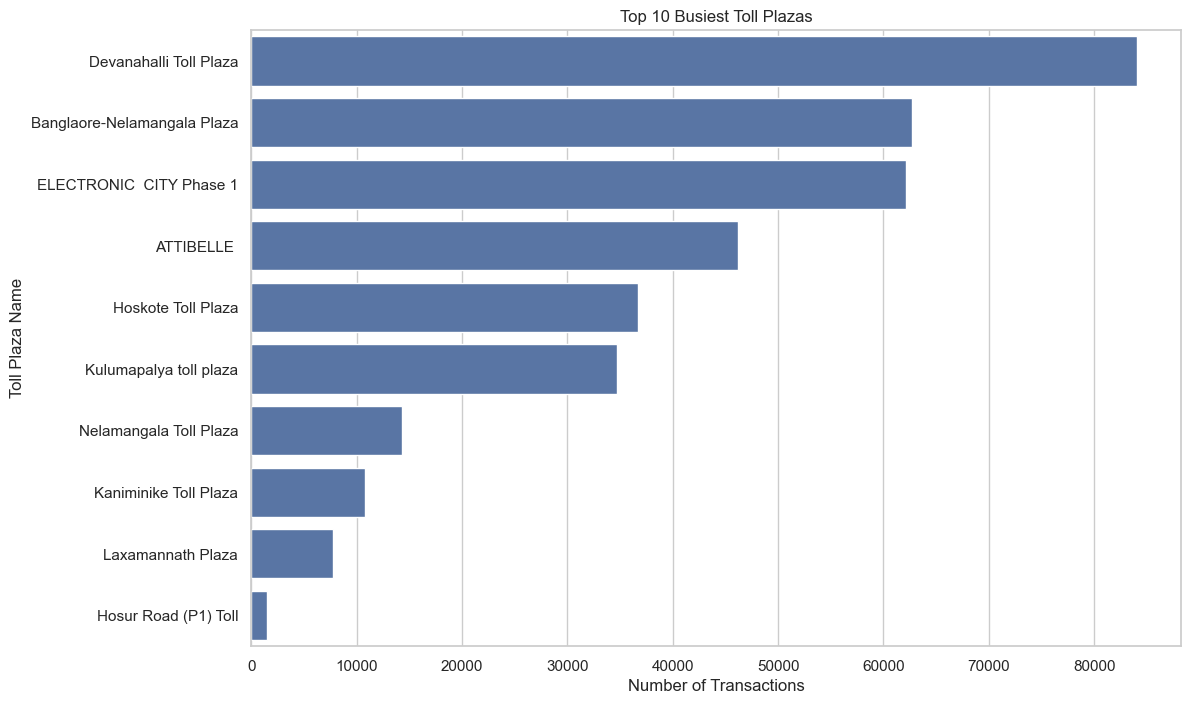

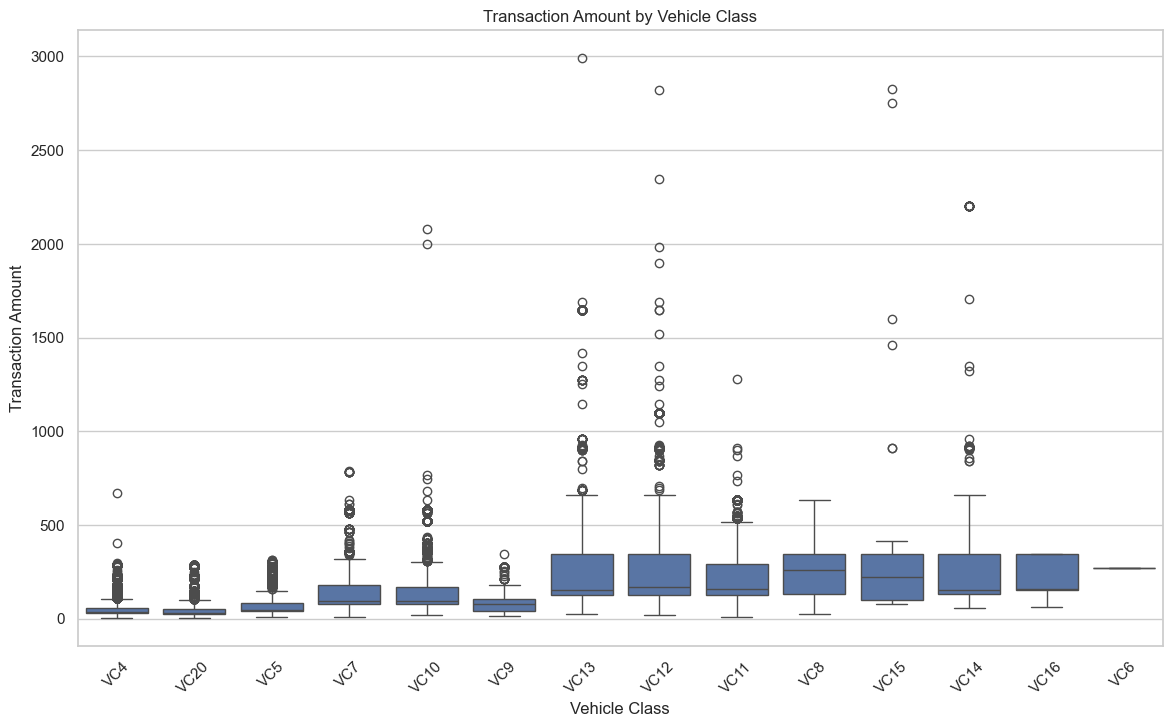

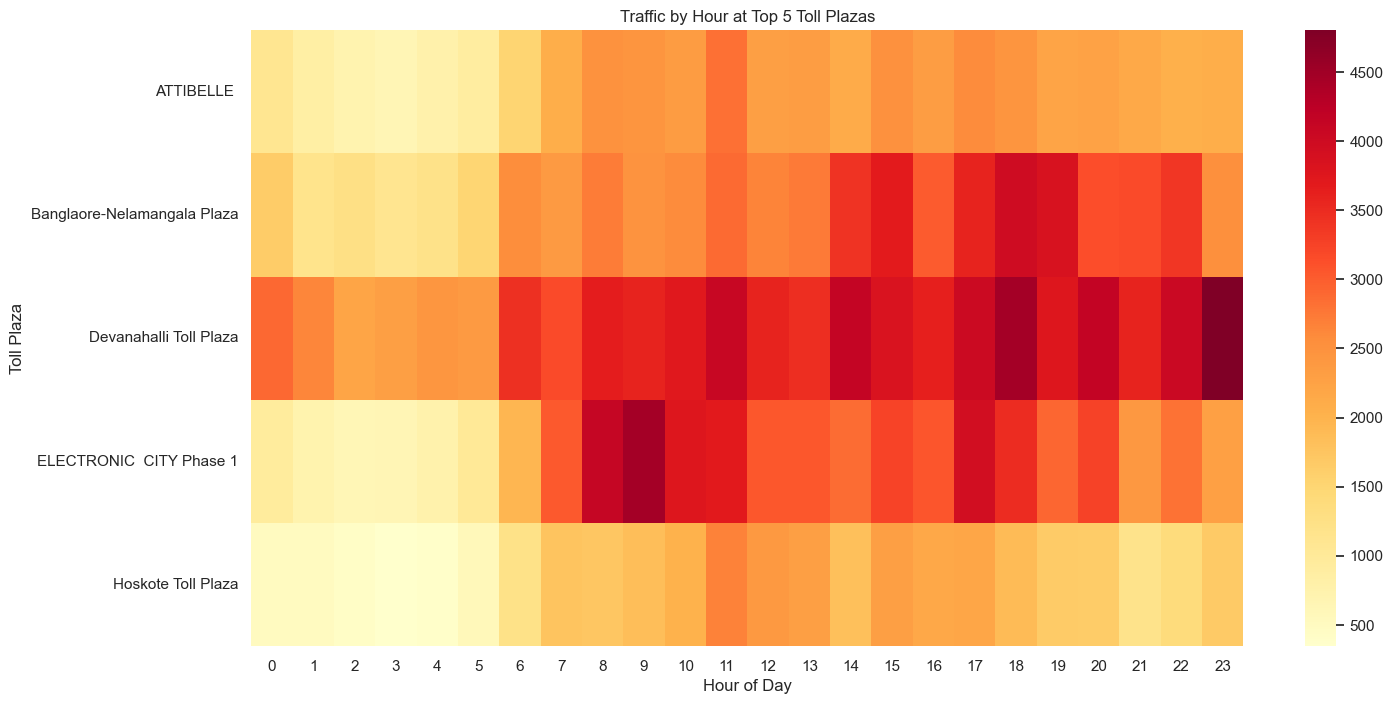


8. Peak Hour Analysis
--------------------------------------------------
Peak hours (above 90th percentile): [11, 17, 18]
Threshold for peak hour: 20233.8 transactions

9. Lane Efficiency Analysis
--------------------------------------------------
      lane         mean  median  count
40  LANE10   157.162838    52.0  12190
67   LANE9   146.445623    59.0  11972
78   Lane7   881.542699   212.0  11417
58   LANE3   178.538800    45.0  10902
50   LANE2   168.030945    57.0  10567
79   Lane8   878.475034   256.0  10414
76   Lane5  1629.442314   379.0   9647
75   Lane4  1162.653165   263.0   9431
62   LANE4   200.114282    49.0   8619
41  LANE11   185.394652    59.0   8377


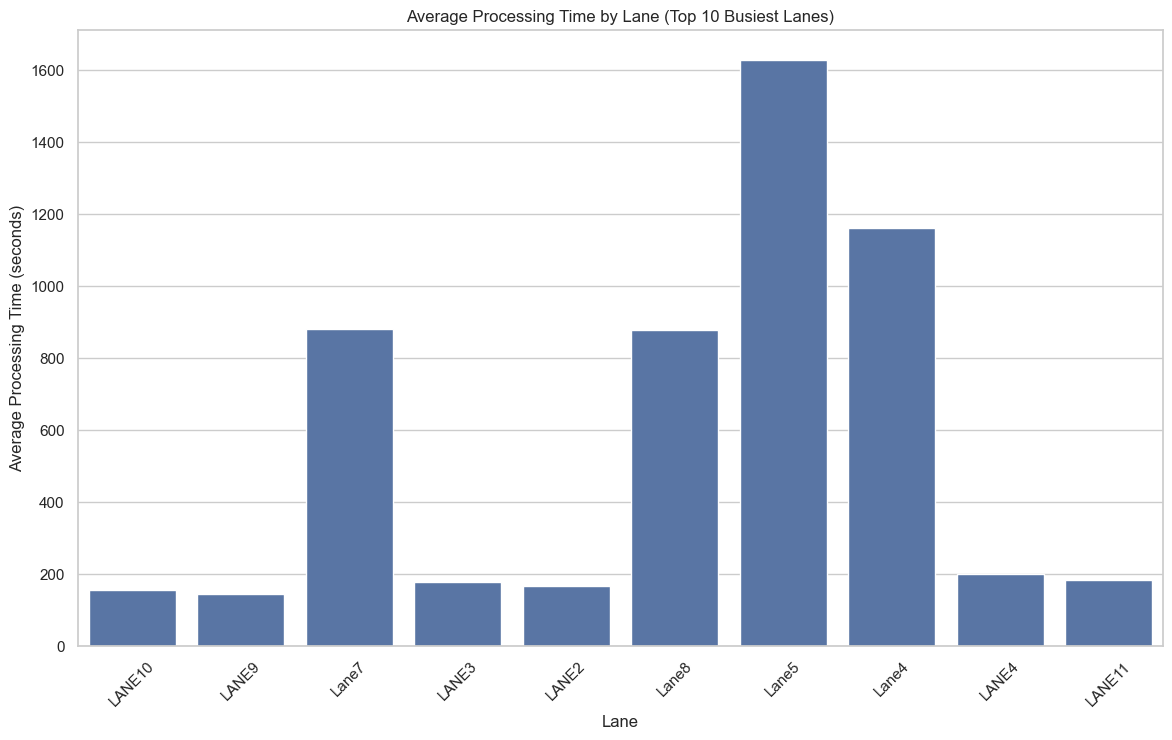

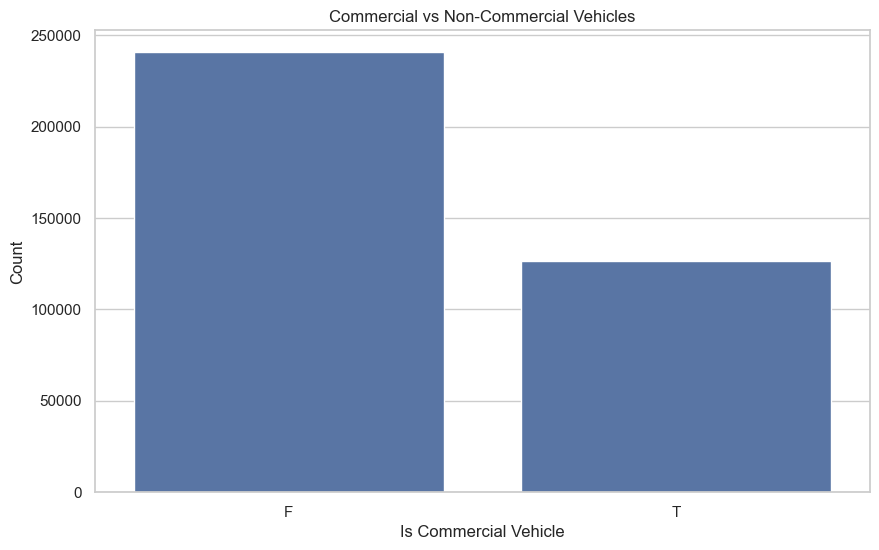

In [95]:
# 3. EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS

# Transaction amount analysis
print("\n7. Transaction Amount Analysis")
print("-" * 50)
print(f"Min Transaction Amount: {df['txn_amount'].min()}")
print(f"Max Transaction Amount: {df['txn_amount'].max()}")
print(f"Mean Transaction Amount: {df['txn_amount'].mean():.2f}")
print(f"Median Transaction Amount: {df['txn_amount'].median()}")

# Plot transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['txn_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Traffic by time of day
plt.figure(figsize=(12, 6))
time_of_day_counts = df['time_of_day'].value_counts().sort_index()
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values)
plt.title('Traffic by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Transactions')
plt.show()

# Traffic by hour
plt.figure(figsize=(14, 6))
hourly_traffic = df.groupby('hour').size()
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o')
plt.title('Hourly Traffic Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

# Vehicle class distribution
plt.figure(figsize=(14, 8))
vehicle_class_counts = df['vehicle_class_code'].value_counts()
sns.barplot(x=vehicle_class_counts.index, y=vehicle_class_counts.values)
plt.title('Vehicle Class Distribution')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Traffic by direction
plt.figure(figsize=(10, 6))
direction_counts = df['direction'].value_counts()
sns.barplot(x=direction_counts.index, y=direction_counts.values)
plt.title('Traffic by Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.show()

# Top busiest toll plazas
plt.figure(figsize=(12, 8))
top_merchants = df['merchant_name'].value_counts().head(10)
sns.barplot(y=top_merchants.index, x=top_merchants.values)
plt.title('Top 10 Busiest Toll Plazas')
plt.xlabel('Number of Transactions')
plt.ylabel('Toll Plaza Name')
plt.show()

# Transaction amount by vehicle class
plt.figure(figsize=(14, 8))
sns.boxplot(x='vehicle_class_code', y='txn_amount', data=df)
plt.title('Transaction Amount by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# Heat map of traffic by hour and toll plaza (for top 5 plazas)
top5_plazas = df['merchant_name'].value_counts().head(5).index
plaza_hour_df = df[df['merchant_name'].isin(top5_plazas)]
heatmap_data = pd.crosstab(plaza_hour_df['merchant_name'], plaza_hour_df['hour'])

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d')
plt.title('Traffic by Hour at Top 5 Toll Plazas')
plt.xlabel('Hour of Day')
plt.ylabel('Toll Plaza')
plt.show()

# Create a function to analyze peak hours
def identify_peak_hours(df, threshold_percentile=90):
    hourly_counts = df.groupby('hour').size()
    peak_threshold = np.percentile(hourly_counts, threshold_percentile)
    peak_hours = hourly_counts[hourly_counts >= peak_threshold].index.tolist()
    return peak_hours, peak_threshold

peak_hours, threshold = identify_peak_hours(df)
print("\n8. Peak Hour Analysis")
print("-" * 50)
print(f"Peak hours (above {90}th percentile): {peak_hours}")
print(f"Threshold for peak hour: {threshold} transactions")

# Analyze lane efficiency
print("\n9. Lane Efficiency Analysis")
print("-" * 50)
lane_stats = df.groupby('lane')['inn_rr_time_sec'].agg(['mean', 'median', 'count']).reset_index()
lane_stats = lane_stats.sort_values('count', ascending=False)
print(lane_stats.head(10))

# Plot lane efficiency
plt.figure(figsize=(14, 8))
top_lanes = lane_stats.head(10)
sns.barplot(x='lane', y='mean', data=top_lanes)
plt.title('Average Processing Time by Lane (Top 10 Busiest Lanes)')
plt.xlabel('Lane')
plt.ylabel('Average Processing Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Commercial vs Non-commercial traffic
if 'vehicle_comvehicle' in df.columns:
    plt.figure(figsize=(10, 6))
    comm_counts = df['vehicle_comvehicle'].value_counts()
    sns.barplot(x=comm_counts.index, y=comm_counts.values)
    plt.title('Commercial vs Non-Commercial Vehicles')
    plt.xlabel('Is Commercial Vehicle')
    plt.ylabel('Count')
    plt.show()

In [ ]:

# 4. FEATURE ENGINEERING FOR MACHINE LEARNING

# Create time-based features for ML models
print("\n10. Additional Feature Engineering for ML")
print("-" * 50)

# Create cyclical time features for better ML performance
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute']/60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute']/60)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)

print("Created cyclical time features for ML models")
print(df[['hour', 'hour_sin', 'hour_cos', 'minute', 'minute_sin', 'minute_cos']].head())

# Create traffic density features
print("\n11. Traffic Density Features")
print("-" * 50)

# Group by 15-minute intervals and count transactions
df['time_interval'] = pd.to_datetime(df['initiated_time']).dt.floor('15min')
interval_counts = df.groupby('time_interval').size().reset_index(name='traffic_count')

# Merge back to original dataframe
df = pd.merge(df, interval_counts, on='time_interval')
print("Created traffic density feature based on 15-minute intervals")
print(df[['initiated_time', 'time_interval', 'traffic_count']].head())

# Identify frequent travelers (tag_ids that appear multiple times)
tag_counts = df['tag_id'].value_counts().reset_index()
tag_counts.columns = ['tag_id', 'frequency']
frequent_tags = tag_counts[tag_counts['frequency'] > 1]['tag_id'].tolist()

df['is_frequent_traveler'] = df['tag_id'].isin(frequent_tags)
print(f"\nIdentified {len(frequent_tags)} frequent travelers (tags appearing multiple times)")
print(f"Percentage of transactions from frequent travelers: {df['is_frequent_traveler'].mean()*100:.2f}%")

# Save preprocessed data
print("\n12. Saving Preprocessed Data")
print("-" * 50)
df.to_csv('data/preprocessed_tollplaza_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_tollplaza_data.csv'")

print("\nPhase 1 data analysis and preprocessing complete!")


10. Additional Feature Engineering for ML
--------------------------------------------------
Created cyclical time features for ML models
   hour  hour_sin      hour_cos  minute  minute_sin  minute_cos
0    21 -0.707107  7.071068e-01      54   -0.587785    0.809017
1    18 -1.000000 -1.836970e-16      59   -0.104528    0.994522
2     0  0.000000  1.000000e+00      14    0.994522    0.104528
3    18 -1.000000 -1.836970e-16      19    0.913545   -0.406737
4    15 -0.707107 -7.071068e-01       3    0.309017    0.951057

11. Traffic Density Features
--------------------------------------------------
Created traffic density feature based on 15-minute intervals
       initiated_time       time_interval  traffic_count
0 2024-03-19 21:54:00 2024-03-19 21:45:00           3514
1 2024-03-19 18:59:00 2024-03-19 18:45:00           5128
2 2024-03-19 00:14:00 2024-03-19 00:00:00           2469
3 2024-03-19 18:19:00 2024-03-19 18:15:00           5598
4 2024-03-19 15:03:00 2024-03-19 15:00:00         